In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error#removing space
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(df.columns[0],axis=1,inplace=True)

In [5]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [7]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [8]:
for col in ['AveragePrice','Total Volume', '4046', '4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year','type','region','Date']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [9]:
df.isnull().values.any()

False

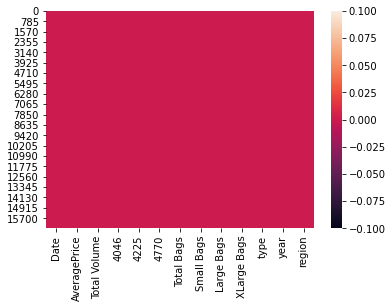

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.141160,-0.188814,-0.095250,-0.103253,-0.113463,-0.100427,-0.176001,-0.053283,0.154888
Total Volume,-0.141160,1.000000,0.986794,0.988446,0.941170,0.970897,0.964659,0.919502,0.561941,0.119751
4046,-0.188814,0.986794,1.000000,0.956328,0.908250,0.936697,0.929482,0.895299,0.516378,0.081224
4225,-0.095250,0.988446,0.956328,1.000000,0.935553,0.957087,0.950161,0.911107,0.547400,0.120794
4770,-0.103253,0.941170,0.908250,0.935553,1.000000,0.934604,0.932084,0.857571,0.676043,0.152861
Total Bags,-0.113463,0.970897,0.936697,0.957087,0.934604,1.000000,0.997646,0.921059,0.636705,0.210872
Small Bags,-0.100427,0.964659,0.929482,0.950161,0.932084,0.997646,1.000000,0.892379,0.645083,0.223888
Large Bags,-0.176001,0.919502,0.895299,0.911107,0.857571,0.921059,0.892379,1.000000,0.495233,0.109670
XLarge Bags,-0.053283,0.561941,0.516378,0.547400,0.676043,0.636705,0.645083,0.495233,1.000000,0.297970
year,0.154888,0.119751,0.081224,0.120794,0.152861,0.210872,0.223888,0.109670,0.297970,1.000000


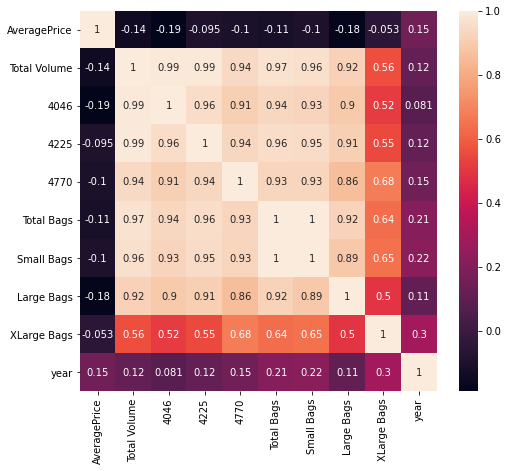

In [12]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

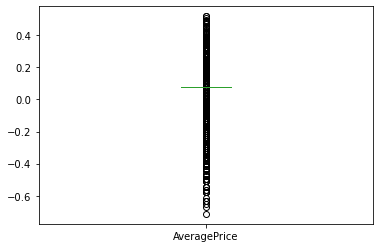

In [37]:
df['AveragePrice'].plot.box()

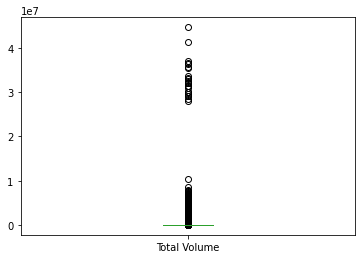

In [39]:
df['Total Volume'].plot.box()

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
year               AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

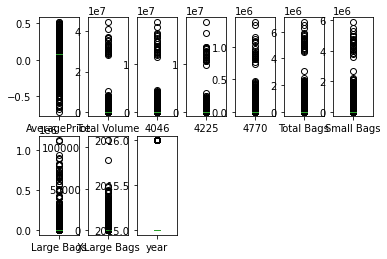

In [40]:
df.plot(kind='box',subplots=True,layout=(2,7))


In [13]:
df.skew()

AveragePrice    -0.597853
Total Volume    20.170327
4046            19.927599
4225            20.602074
4770            17.848307
Total Bags      17.606810
Small Bags      17.606449
Large Bags      17.157423
XLarge Bags     19.392479
year             7.981159
dtype: float64

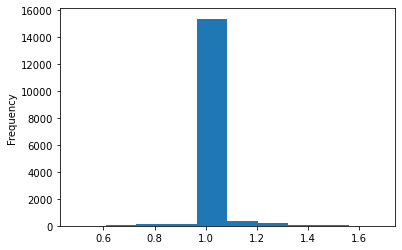

In [14]:
df['AveragePrice'].plot.hist()

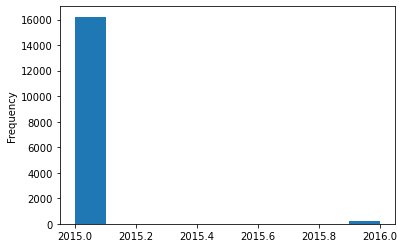

In [15]:
df['year'].plot.hist()

In [16]:
from scipy.stats import boxcox
# 0 -> log transform
# .5 -> Square root transform
df['AveragePrice']=boxcox(df['AveragePrice'],0)

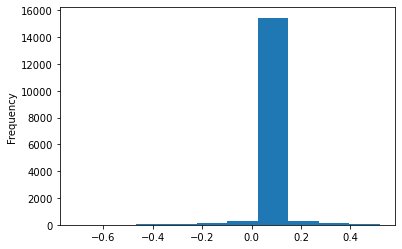

In [17]:
df['AveragePrice'].plot.hist()

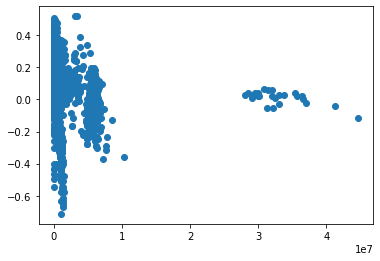

In [18]:
plt.scatter(df['Total Volume'],df['AveragePrice'])


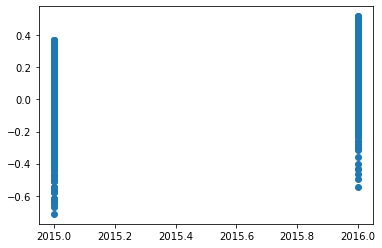

In [19]:
plt.scatter(df['year'],df['AveragePrice'])


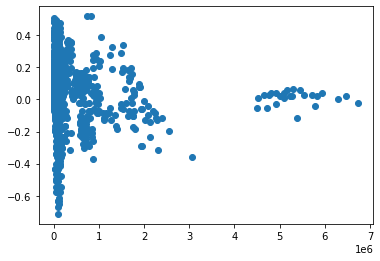

In [20]:
plt.scatter(df['Total Bags'],df['AveragePrice'])


In [21]:
df.shape

(16468, 13)

In [22]:
x=df.iloc[:,0:-1]
x.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,27-12-2015,0.285179,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0
1,20-12-2015,0.300105,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0
2,13-12-2015,-0.072571,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0
3,06-12-2015,0.076961,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0
4,29-11-2015,0.246860,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0


In [23]:
y=df.iloc[:,-1]
y.head()

0    Albany
1    Albany
2    Albany
3    Albany
4    Albany
Name: region, dtype: object

In [24]:
x.shape

(16468, 12)

In [25]:
y.shape

(16468,)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [27]:
x_train.shape

(11033, 12)

In [28]:
y_train.shape

(11033,)

In [29]:
x_test.shape

(5435, 12)

In [30]:
y_test.shape

(5435,)